**optoSTING results - Figure 2 - Identification of the *ReLU* relation**

# Imports

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from plotstyle import defaultStyle, save_fig
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import mygene
from matplotlib.gridspec import GridSpec
from ast import literal_eval

defaultStyle()
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

DATA_DIR = os.path.join("../data/")
data_xls = os.path.join(DATA_DIR, "Experimental_Data_1.xlsx")

# Utils

In [3]:
def relu(fs_arr, fs_c, gamma, yintercp):
    return np.array([gamma * np.max([0, fs - fs_c]) + yintercp for fs in fs_arr])


def sr_relu_plot(rawdata, x=50, y=50, p0=[50, 2, 3], hue="sr_ratio", hue_log=True, ax=None, cmap="autumn_r", cbar_ticks=[1/100, 1/10, 1, 10, 100], inclusive=True):
    # Scatter plot
    # data = rawdata.copy(deep=True).dropna(how='any', inplace=True)
    if hue_log:
        hue_data = np.log(data[hue])
    else:
        hue_data = data[hue]
    sns.scatterplot(x="sender", y="receiver", hue=hue_data, data=data, legend=False, markers="o", s=100, palette=cmap, ax=ax)
    ax.scatter([100], [100], s=100, edgecolor="k", color="white")
    xdata = np.linspace(0, np.max(data["sender"]), 1000)
    xdata_2 = np.linspace(np.max(data["sender"]), 120, 1000)
    
    # Fitting
    if inclusive:
        popt, pcov = curve_fit(relu, data["sender"].tolist() + [100], data["receiver"].tolist() + [100], p0=p0)
    else:
        popt, pcov = curve_fit(relu, data["sender"].tolist(), data["receiver"].tolist(), p0=p0)
    ax.plot(xdata, relu(xdata, *popt), "k", lw=2)
    ax.plot(xdata_2, relu(xdata_2, *popt), "k", ls="--", lw=2)
    r2score = r2_score(data["receiver"], relu(data["sender"], *popt))
    ax.text(x, y, "$\mathregular{R^2=%.2f}$"%r2score, fontsize=14)
    
    return r2score

# S-R *ReLU*

Saving figure expr_relu


/home/liboyan/Documents/optoSTING/scripts/plotstyle.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


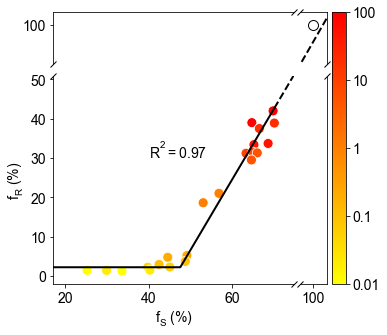

In [5]:
sheet_name = "191019_SRMix"
data = pd.read_excel(data_xls, sheet_name=sheet_name, engine="openpyxl", keep_default_na=False)
data['sr_ratio_log'] = data.sr_ratio.apply(np.log)

xlims = [[17, 75], [97, 103]]
ylims = [[91, 103], [-2, 51]]

fig = plt.figure(figsize=(5.25, 5))
gs = GridSpec(2, 3, width_ratios=[9, 1, 0.5], height_ratios=[2, 8], wspace=0.06, hspace=0.09)
# gs = gs_full[:, :2]

kwargs = dict(marker=[(-1, -1), (1, 1)], markersize=6, linestyle="none", color='k', mec='k', mew=1, clip_on=False)

cmap = "autumn_r"
p0 = [50, 2, 3]
popt, pcov = curve_fit(relu, data["sender"].tolist() + [100], data["receiver"].tolist() + [100], p0=p0)
xdata = np.linspace(0, np.max(data["sender"]), 1000)
xdata_2 = np.linspace(np.max(data["sender"]), 120, 100)
    
r2score = r2_score(data["receiver"], relu(data["sender"], *popt))

axes = []
for i in [0, 1]:
    for j in [0, 1]:
        ax = fig.add_subplot(gs[i, j])
        axes.append(ax)
        if i == 0:
            dict(ax.spines)['bottom'].set_visible(False)
            ax.xaxis.set_visible(False)
        else:
            dict(ax.spines)['top'].set_visible(False)
        if j == 0:
            dict(ax.spines)['right'].set_visible(False)
        else:            
            dict(ax.spines)['left'].set_visible(False)
            ax.yaxis.set_visible(False)
        ax.plot(xdata, relu(xdata, *popt), "k", lw=2)
        ax.plot(xdata_2, relu(xdata_2, *popt), "k", ls="--", lw=2)
        sns.scatterplot(
            x="sender", 
            y="receiver", 
            hue='sr_ratio_log', 
            data=data, 
            legend=False, 
            markers="o", 
            s=100,
            palette=cmap, 
            ax=ax
        )
        ax.plot([i], [j], transform=ax.transAxes, **kwargs)
        ax.plot([1-i], [1-j], transform=ax.transAxes, **kwargs)
        ax.scatter([100], [100], s=100, edgecolor="k", color="white")
        ax.set_xlim(xlims[j])
        ax.set_ylim(ylims[i])
        ax.set_xlabel('')
        ax.set_ylabel('')

axes[2].set_xlabel("$\mathregular{f_S\;(\%)}$")
axes[2].set_ylabel("$\mathregular{f_R\;(\%)}$")
axes[2].text(40, 30, "$\mathregular{R^2=%.2f}$"%r2score, fontsize=14)
axes[0].set_yticks([100])
axes[3].set_xticks([100])

# Colorbar
ax = fig.add_subplot(gs[:, 2])
cbar_ticks = [1/100, 1/10, 1, 10, 100]
norm = plt.Normalize(data.sr_ratio_log.min(), data.sr_ratio_log.max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cb = plt.colorbar(sm, cax=ax)
cb.set_ticks(np.log(cbar_ticks))
cb.set_ticklabels(cbar_ticks)
ax.set_xlabel("S:R", fontsize=14)
save_fig("expr_relu")

# Varying lighting intensities

## 0.5h

Saving figure 0.5h_relu


/home/liboyan/Documents/optoSTING/scripts/plotstyle.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


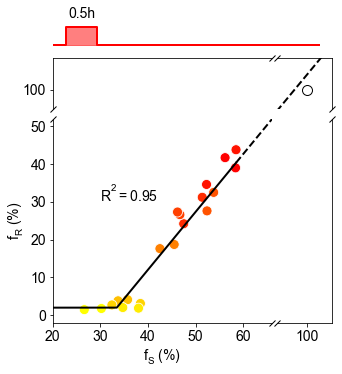

In [6]:
sheet_name = "210825_SRMix_0.5h"
data = pd.read_excel(data_xls, sheet_name=sheet_name, engine="openpyxl")
data['sr_ratio_log'] = data.sr_ratio.apply(np.log)

xlims = [[20, 66], [94, 105]]
ylims = [[95, 108], [-2, 52]]

fig = plt.figure(figsize=(5, 5.5))
gs = GridSpec(3, 2, width_ratios=[8, 2], height_ratios=[1, 2, 8], wspace=0.04, hspace=0.1)

kwargs = dict(marker=[(-1, -1), (1, 1)], markersize=6, linestyle="none", color='k', mec='k', mew=1, clip_on=False)

cmap = "autumn_r"
p0 = [50, 2, 3]
popt, pcov = curve_fit(relu, data["sender"].tolist() + [100], data["receiver"].tolist() + [100], p0=p0)
xdata = np.linspace(0, np.max(data["sender"]), 1000)
xdata_2 = np.linspace(np.max(data["sender"]), 120, 100)
    
r2score = r2_score(data["receiver"], relu(data["sender"], *popt))
ax = fig.add_subplot(gs[0, :2])
ax.plot([-0.2, 0, 0, 0.5, 0.5, 4], [0, 0, 1, 1, 0, 0], c="r", lw=2)
ax.fill([0, 0, 0.5, 0.5, 0], [0, 1, 1, 0, 0], color="r", alpha=0.5)
ax.set_xlim([-0.2, 4.2])
ax.set_ylim([-0.2, 1.2])
ax.axis("off")
ax.text(0.05, 1.5, "0.5h", fontsize=14, family="Arial")

axes = []
for i in [0, 1]:
    for j in [0, 1]:
        ax = fig.add_subplot(gs[i+1, j])
        axes.append(ax)        
        if i == 0:
            dict(ax.spines)['bottom'].set_visible(False)
            ax.xaxis.set_visible(False)
        else:
            dict(ax.spines)['top'].set_visible(False)
        if j == 0:
            dict(ax.spines)['right'].set_visible(False)
        else:            
            dict(ax.spines)['left'].set_visible(False)
            ax.yaxis.set_visible(False)
        ax.plot(xdata, relu(xdata, *popt), "k", lw=2)
        ax.plot(xdata_2, relu(xdata_2, *popt), "k", ls="--", lw=2)
        sns.scatterplot(
            x="sender", 
            y="receiver", 
            hue='sr_ratio_log', 
            data=data, 
            legend=False, 
            markers="o", 
            s=100,
            palette=cmap, 
            ax=ax
        )
        ax.plot([i], [j], transform=ax.transAxes, **kwargs)
        ax.plot([1-i], [1-j], transform=ax.transAxes, **kwargs)
        ax.scatter([100], [100], s=100, edgecolor="k", color="white")
        ax.set_xlim(xlims[j])
        ax.set_ylim(ylims[i])
        ax.set_xlabel('')
        ax.set_ylabel('')

axes[2].set_xlabel("$\mathregular{f_S\;(\%)}$")
axes[2].set_ylabel("$\mathregular{f_R\;(\%)}$")
axes[2].text(30, 30, "$\mathregular{R^2=%.2f}$"%r2score, fontsize=14)
axes[0].set_yticks([100])
axes[3].set_xticks([100])
save_fig("0.5h_relu")

## 1h

Saving figure 1h_relu


/home/liboyan/Documents/optoSTING/scripts/plotstyle.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


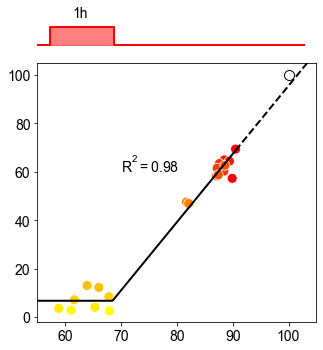

In [7]:
sheet_name = "210825_SRMix_1h"
data = pd.read_excel(data_xls, sheet_name=sheet_name, engine="openpyxl")
data['sr_ratio_log'] = data.sr_ratio.apply(np.log)

fig = plt.figure(figsize=(5, 5.5))
gs = GridSpec(2, 1, height_ratios=[1, 10], hspace=0.1)

ax = fig.add_subplot(gs[0])
ax.plot([-0.2, 0, 0, 1, 1, 4], [0, 0, 1, 1, 0, 0], c="r", lw=2)
ax.fill([0, 0, 1, 1, 0], [0, 1, 1, 0, 0], color="r", alpha=0.5)
ax.set_xlim([-0.2, 4.2])
ax.set_ylim([-0.2, 1.2])
ax.axis("off")
ax.text(0.35, 1.5, "1h", fontsize=14)

ax = fig.add_subplot(gs[1])
sr_relu_plot(data, x=70, y=60, ax=ax)
ax.axis([55, 105, -2, 105])
ax.set_xlabel('')
ax.set_ylabel('')
save_fig("1h_relu")

## 3h

Saving figure 3h_relu


/home/liboyan/Documents/optoSTING/scripts/plotstyle.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


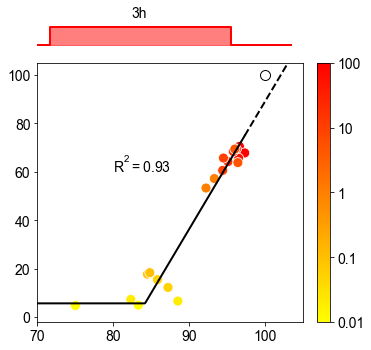

In [8]:
sheet_name = "210825_SRMix_3h"
data = pd.read_excel(data_xls, sheet_name=sheet_name, engine="openpyxl")
data['sr_ratio_log'] = data.sr_ratio.apply(np.log)

fig = plt.figure(figsize=(5.25, 5.5))
gs = GridSpec(2, 2, height_ratios=[1, 10], width_ratios=[10, 0.5], wspace=0.1, hspace=0.1)

ax = fig.add_subplot(gs[0, 0])
ax.plot([-0.2, 0, 0, 3, 3, 4], [0, 0, 1, 1, 0, 0], c="r", lw=2)
ax.fill([0, 0, 3, 3, 0], [0, 1, 1, 0, 0], color="r", alpha=0.5)
ax.set_xlim([-0.2, 4.2])
ax.set_ylim([-0.2, 1.2])
ax.axis("off")
ax.text(1.35, 1.5, "3h", fontsize=14)

ax = fig.add_subplot(gs[1, 0])
sr_relu_plot(data, x=80, y=60, ax=ax)
ax.axis([70, 105, -2, 105])
ax.set_xlabel('')
ax.set_ylabel('')

# Colorbar
ax = fig.add_subplot(gs[1, 1])
cbar_ticks = [1/100, 1/10, 1, 10, 100]
norm = plt.Normalize(data.sr_ratio_log.min(), data.sr_ratio_log.max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cb = plt.colorbar(sm, cax=ax)
cb.set_ticks(np.log(cbar_ticks))
cb.set_ticklabels(cbar_ticks)
ax.set_xlabel("S:R", fontsize=14)
save_fig("3h_relu")

## Bar plot

Saving figure sender-receiver_BarPlot


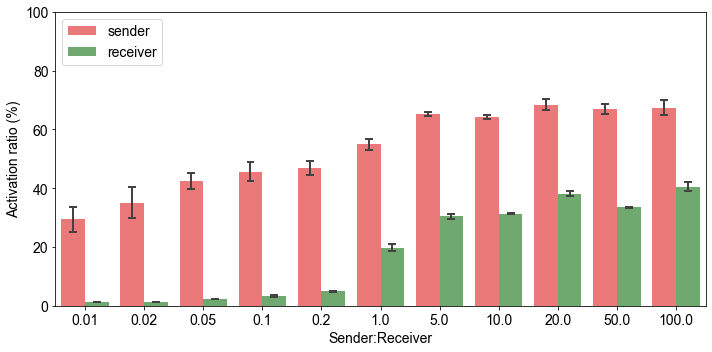

In [9]:
def fs_fr_barplots(data_xls, sheet_name):
    defaultStyle(fs=14)
    data = pd.read_excel(data_xls, sheet_name=sheet_name, engine="openpyxl")
    grouped_data = pd.DataFrame(columns=["sr_ratio", "activ_ratio", "cell"])
    grouped_data["sr_ratio"] = data.sr_ratio.tolist() * 2
    grouped_data["activ_ratio"] = data.sender.tolist() + data.receiver.tolist()
    grouped_data["cell"] = len(data) * ["sender"] + len(data) * ["receiver"]
    _, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.barplot(
        data=grouped_data,
        x="sr_ratio", y="activ_ratio", hue="cell",
        ci="sd", alpha=.6, ax=ax, palette=["red", "green"],
        capsize=0.1, errwidth=2,
    )
    ax.legend(title="", fontsize=14, loc="upper left")
    ax.set(xlabel="Sender:Receiver", ylabel="Activation ratio (%)", ylim=[0, 100])

    
for sheet_name in ["191019_SRMix"]:
    fs_fr_barplots(data_xls=data_xls, sheet_name=sheet_name)
    save_fig("sender-receiver_BarPlot")